# Exploring Non-Traditional Big Data Sources to Understand Evolving Transportation Trends in New York City, Septermber 2014

Raymond Gerte, 2016 TURF Fellowship


note: This interactive notebook is intended to showcase snippets of code used to complete the analysis as well as provide some of the unique levels of interactivity allowed when using this set of analysis tools

# Background

This research project aims to make sense of burgeoning transportation trends brought on by the growing popularity of shared ride mobility solutions. It is apparent from the commercial success and worldwide growth of shared ride providers that they have found a niche in the conventional transportation ecosystem. The goal of this project is to explore how shared ride culture is fitting into the established taxi based system in New York City using non-traditional large data sources. A non-traditional big data source in the context of this project is one that contains a very large amount of individual data points that together can be grouped and analyzed to show patterns, trends, or interesting values that might otherwise not be apparent from the raw data. It is important to note that in the context of this project, shared ride providers have not been limited to those strictly vehicular in nature. New York City's Citi Bike program has also been included. 

# Methods and Data

In order to begin the analysis, a list of modes to investigate was compiled. The complete list considered for this project is as follows: New York's Yellow and Green taxis, Uber, and Citi Bike. In order to better understand the context, some background information on each mode is necessary. In NYC, yellow taxis operate throughout the city and happen to be the only taxi service to run on street pickups on the island of Manhattan. Green taxis operate in the same manner but are limited in on street pick up service to Northern Manhattan and the outer boroughs. Uber is a hired car service run mostly through the use of its mobile app where users specify where they want to be picked up. Finally, Citi Bike is a program where users pay for the use of a bike (typically for 30 min) which can then be dropped off at any of the other stations. Within the scope of this investigation, the program only had stations on Manhattan and in Brooklyn.

Traditional research geared towards understanding transportation trends typically revolves around the use of a survey distributed to households and relies on the users to accurately track and record their trips. The interesting part about this analysis is that it was completed using only open source "Big Data". This provided some unique benefits and challenges. The most glaring challenge was the sheer size of the data, and the fact that the data pools for both taxi types, Uber, and Citi Bike are all separate entities. In order to handle and process the sheer volume of data points, the analysis was focused down to encompass a single month, September 2014 (16,717,932 trips), in which data from all modes was present. Along with selecting a smaller subset of data, the data also needed to be linked spatially. In the case of these datasets, the data represented trip information and included information on pickup times and locations. Each dataset had unique information outside of just pickup time and location but these variables were the only ones common across all data sets. In order to process the vast amount of individual data points, the Python coding language and the associated libraries Pandas, Bokeh, and Datashader were utilized.


# Exisiting Research and Analysis

The existing research using large data sets to analize trends in NYC consists of work done by researchers at FiveThirtyEight. It is through their FOIL request and subsequent information release that Uber trip data is avaliable to the public. A complete list of their Uber related articles can be found here: (http://fivethirtyeight.com/tag/transportation/).
They have investigated topics like ridership shifts and service area distributions between New York's taxis and Uber. To summerize their findings, from 2014 to 2015 Uber popularity has grown and the shift in ridership has come mostly from taxis. They have also found that over that same timespan, Uber has made more pickups along the cities boundries. 

Another independent researcher to do work with these datasets is Todd Schneider. His work is focused primarily on the spatial distribution of trips around the city and how taxis and Uber compare in various boroughs/neighborhoods (http://toddwschneider.com/posts/analyzing-1-1-billion-nyc-taxi-and-uber-trips-with-a-vengeance/). His findings explore trends in users modal choice for various hot spots around the city, and even investigate travel times by mode to the cities airports. In a seperate investigation, he also did an analysis with Citi Bike data. This analysis focused soley on the Citi Bike trips and explored average trip rates and trips by various user characteristics (http://toddwschneider.com/posts/a-tale-of-twenty-two-million-citi-bikes-analyzing-the-nyc-bike-share-system/). 

Neither of these researchers have explored the data sets (taxi, Uber, and Citi Bike) together, which is a novel concept within this investigation.

# Temporal Analysis

At the most coarse temporal level, trends were investigated by the number of trips made on each target modes for every day of the month. Subsequent analysis was done on finer temporal scales as the number of trips on each target mode were investigated during various time blocks throughout the day. The time blocks investigated in this project were the morning commute block (7-10am), the evnening commute block (4-7pm), and a late night block (10pm-12am). Weather information (mean temperature and total daily percipitation) was also included in the temporal analysis as a tool to understand potential shifts.

These analysis windows were selected in order to investigate variety of questions concerning travel trends in NYC:

1) At the day level, are there any noticeble trends in how people are using the modes across each week? across the entire month?

2) If there are identifiable trends at the day level, do they hold across the different time windows?

3) What modes do people seem to be taking to and from work? for a night out?

4) How do changes in temperature and percipitation effect modal choices?


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from bokeh.charts import Line, output_notebook, show, Bar
from bokeh.models import (FactorRange, CategoricalAxis, VBox, Range1d,
                          LinearAxis, DatetimeTickFormatter)
from bokeh.plotting import figure
from bokeh.layouts import gridplot, column
output_notebook()

Loading BokehJS ...

In [2]:
# Load in trip data filtered only by trips made by mode on each day of the month
trips = pd.read_csv('Sep2014_DayTripCount.csv', parse_dates=[0], index_col=[0])
graph = Line(trips, title='NYC September 2014 Trip Distribution by Day',
             legend='top_left', ylabel='Trips',
             color=['blue', 'green', 'black', 'yellow'], plot_width=650,
             plot_height=400, xlabel='Date')

graph.xaxis.formatter = DatetimeTickFormatter(
    formats=dict(
        days=["%a %m/%d"]
    )
)

In [3]:
am_trips = pd.read_csv('Sep2014_AMCommuteTripCount.csv', parse_dates=[0], index_col=[0])
graph2 = Line(am_trips,
              title='NYC September 2014 Morning Commute (7-10am): Trips by Mode',
              legend='top_left', ylabel='Trips', xlabel='Date', plot_width=650,
              plot_height=400, color=['blue', 'green', 'black', 'yellow'])
graph2.x_range = graph.x_range

graph2.xaxis.formatter = DatetimeTickFormatter(
    formats=dict(
        days=["%a %m/%d"]
    )
)

In [4]:
pm_trips = pd.read_csv('Sep2014_PMCommuteTripCount.csv', parse_dates=[0], index_col=[0])
graph4 = Line(pm_trips,
              title='NYC September 2014 Evening Commute (4-7pm): Trips by Mode',
              legend='top_left', ylabel='Trips', xlabel='Date', plot_width=650,
              plot_height=400, color=['blue', 'green', 'black', 'yellow'])
graph4.x_range = graph.x_range
graph4.xaxis.formatter = DatetimeTickFormatter(
    formats=dict(
        days=["%a %m/%d"]
    )
)

In [5]:
late_trips = pd.read_csv('Sep2014_LateTripCount.csv', parse_dates=[0], index_col=[0])
graph5 = Line(late_trips,
              title='NYC September 2014 Late Night Trips (10pm-12am): Trips by Mode',
              legend='top_left', ylabel='Trips', xlabel='Date', plot_width=650,
              plot_height=400, color=['blue', 'green', 'black', 'yellow'])
graph5.x_range = graph.x_range
graph5.xaxis.formatter = DatetimeTickFormatter(
    formats=dict(
        days=["%a %m/%d"]
    )
)

In [6]:
# Average Weather (Mean Temp & Total Percipitation) to understand possible modal shifts due to changes in weather
weather = pd.read_csv('Sep2014Weather.csv', parse_dates=[0], index_col='Date',
                      usecols=['Date', 'mean_temp', 'percipitation'])
graph3 = figure(title='September 2014 Weather', plot_width=650, plot_height=400,
                tools='pan, wheel_zoom, save, reset', x_axis_type='datetime', y_range=Range1d(0, 90))

graph3.line(weather.index, weather['mean_temp'], line_color='orange', line_width=2, legend='temperature')
graph3.yaxis.axis_label = 'Temperature (F)'
graph3.extra_y_ranges = {'Percipitation': Range1d(0, .75)}
graph3.add_layout(LinearAxis(y_range_name='Percipitation',
                             axis_label='Percipitation (in)'), 'right')
graph3.line(weather.index, weather['percipitation'],
            y_range_name='Percipitation', line_color='blue', line_width=2,
            legend='percipitation')
graph3.x_range = graph.x_range
graph3.toolbar_location = 'above'
graph3.xaxis.axis_label = 'Date'
graph3.legend.location = 'bottom_left'
graph3.xaxis.formatter = DatetimeTickFormatter(
    formats=dict(
        days=["%a %m/%d"]
    )
)

In [7]:
trips

,yellow_trips,green_trips,citibike_trips,uber_trips,weekday
2014-09-01,319157,35949,23575,19961,Monday
2014-09-02,408333,37020,30507,28831,Tuesday
2014-09-03,441040,39511,35535,32631,Wednesday
2014-09-04,469500,43408,36496,38360,Thursday
2014-09-05,496714,50318,34831,42319,Friday
2014-09-06,503100,59539,25833,40520,Saturday
2014-09-07,445959,48649,29721,30134,Sunday
2014-09-08,430611,37058,34335,30360,Monday
2014-09-09,450763,37740,34518,34560,Tuesday
2014-09-10,466592,39791,37653,35910,Wednesday


In [8]:
am_trips

,yellow cab,green cab,citibike,uber,weekday
2014-09-01,20761,1906,1513,1767,Monday
2014-09-02,67409,5167,6142,4598,Tuesday
2014-09-03,69845,5239,7656,4753,Wednesday
2014-09-04,71612,6052,7737,5032,Thursday
2014-09-05,71646,5765,7491,5199,Friday
2014-09-06,37467,3202,2344,2764,Saturday
2014-09-07,30056,2512,2017,2426,Sunday
2014-09-08,66324,5657,7352,4701,Monday
2014-09-09,71130,5508,8279,4900,Tuesday
2014-09-10,71276,5761,8302,4930,Wednesday


In [9]:
pm_trips

,yellow cab,green cab,citibike,uber,weekday
2014-09-01,58296,6471,5815,4083,Monday
2014-09-02,65606,7084,9030,6184,Tuesday
2014-09-03,67232,7538,9826,7213,Wednesday
2014-09-04,65865,7787,9888,8371,Thursday
2014-09-05,68118,9267,9245,8819,Friday
2014-09-06,71966,9358,5722,8246,Saturday
2014-09-07,69751,7714,7443,6115,Sunday
2014-09-08,70680,6952,9919,6596,Monday
2014-09-09,67294,7153,9283,7575,Tuesday
2014-09-10,68429,7463,10428,8136,Wednesday


In [10]:
late_trips

,yellow cab,green cab,citibike,uber,weekday
2014-09-01,27956,3677,942,1326,Monday
2014-09-02,35752,3425,1106,1821,Tuesday
2014-09-03,44856,3962,1384,2498,Wednesday
2014-09-04,53869,4900,1577,3491,Thursday
2014-09-05,60525,7112,1395,5057,Friday
2014-09-06,62430,8685,834,5683,Saturday
2014-09-07,33598,3925,1242,1791,Sunday
2014-09-08,39835,3048,1269,1707,Monday
2014-09-09,46680,3684,1395,2287,Tuesday
2014-09-10,50618,3982,1499,2532,Wednesday


In [11]:
# Linked Display of trip counts by mode at various times across the day.
#Disp = column(graph, graph2, graph4, graph5, graph3)
#show(Disp)

<img src="all_trips.PNG">

<img src="am_trips.PNG">

<img src="pm_trips.PNG">

<img src="ln_trips.PNG">

<img src="weather.PNG">

# Temporal Trends

Based on the graphs above, it is clear that for at least the month of September 2014 yellow taxis were the most dominant mode across all time frames investigated. This can be explained by the fact that they have the largest presence in the busiest portion of the city, Manhattan. If we look at the total distribution of trips by mode across each day, we can see a pronounced periodicity as trip numbers reach a minimum at the beginning of the week (Sunday and Monday), but then steadily climb until peaking at the start of each weekend (Friday and Saturday). This holds true for both taxi types and Uber, but Citi Bike trips don't necessarily seem to be as swayed by the weekend tide. One possible explanation of this could be that the Citi Bike users are a loyal group, and even with the conventional shift to more recreational trips during the weekend, Citi Bike users continue to make those trips by bike. Another interesting trend to note is the fact that during the week (Monday-Thursday), green cabs, Uber, and Citi Bike maintained total trip counts between 35-40,000 trips across the entire day. During the weekend however, the green cabs have a marked advantage over both Uber and Citi Bike. This may not be the most useful comparison, as green taxis are prohibited from completing pickups on Manhattan (although they can still complete drop offs), as seen in the green spatial distribution presented below.

Digging deeper into the temporal frequencies, some more interesting trends can be drawn out. When looking at pickups between the hours of 7-10am, or typical morning commute trips, we can see the yellow cabs still hold a clear advantage in volume. Another periodic bell shaped trend is also apparent, and this time reflects the conventional wisdom that morning work commute trips decrease on weekends and the days immediately following weekends. Another quite interesting trend is the use of Citi Bike. On days without precipitation, Citi Bike holds a larger share of commuters than both green cabs and Uber. Also worth noting, is the steeper spikes on the rainy days in Uber usage. It is logical to assume Citi Bike users aren't going to bike in the rain, and those individuals who typically walk might also take a cab or Uber, so users beginning trips on Manhattan are left with either an Uber or a yellow taxi (assuming minimal jumps to transit modes). The spikes seen in these two modes show a comparably larger jump in Uber which would suggest that Citi Bike user’s trend towards Uber rather than a cab. This is especially evident on September 25th, but there is only a limited sample of rainy days so more investigation is needed.

When looking at the evening commute trips, it is immediately apparent that they are quite different from all other time frames investigated. Namely, they lack an identifiable periodic tendency. Conventionally speaking, evening commute trips should be a reflection, at least in some way, of the morning commute. This doesn't always hold as people become more active in the evening, but for yellow cab trips made during the evening block there is almost no identifiable trend. At least when looking at the less popular modes, Citi Bike still manages to hold a majority of weekly evening commute trips, weather permitting.

When looking at late night trips (10pm-12am), the periodic swell as the weekend approaches is even more pronounced than at the day level and can be said with a high level of certainty to contribute to the day level fluctuation. Also noteworthy is the fact that both taxi types hold a clear advantage over Uber. As the data presented here is from 2014, Uber's share of trips in general is lower than what can be seen today. It would also appear that users are choosing modes other than Citi Bike for trips at night as the trip numbers remained very low, around 1200 trips on average. This can possibly be explained by the higher feelings of perceived safety associated with vehicular trip like a cab as opposed to riding a bike late at night or after a night out on the town.

# Spatial Analysis

At the spatial level, trends were mainly investigated by easily identifiable modal hotspots and how these hotspots compared to one another. The spatial data is only representative of pick up trips, and in the case of Citi Bike where users intitally borrowed a bike.

The main questions that I hoped to address using the spatial data were:

1) Where are the highest concentations of trips begining for each mode?

2) Are there any overlap in modal hotspots?

3) Are there any areas within the city that one mode holds a higher concentration than the rest?

In [13]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from pyproj import Proj, transform
from bokeh.tile_providers import STAMEN_TERRAIN, STAMEN_TONER
import datashader as ds
from datashader import transfer_functions as tf
from datashader.bokeh_ext import InteractiveImage

# Import Geodata by mode
#uber_df = pd.read_csv('uber_geodata.csv', index_col=[0])
#yellow_df = pd.read_csv('yellowcab_geodata.csv', index_col=[0])
#green_df = pd.read_csv('greencab_geodata.csv', index_col=[0])
#citi_df = pd.read_csv('citibike_geodata.csv', index_col=[0])


In [13]:
# all geo coordinates are in standard lat/long but to be integrated with the tiles they need to be
# in web mercator format.

from_proj = Proj("+init=EPSG:4326")
to_proj = Proj("+init=EPSG:3857")

uber_longi = uber_df['pickup_longitude'].values.tolist() 
uber_lati = uber_df['pickup_latitude'].values.tolist()
yellow_longi = yellow_df['pickup_longitude'].values.tolist()
yellow_lati = yellow_df['pickup_latitude'].values.tolist()
green_longi = green_df['pickup_longitude'].values.tolist()
green_lati = green_df['pickup_latitude'].values.tolist()
citi_longi = citi_df['start_station_longitude'].values.tolist()
citi_lati = citi_df['start_station_latitude'].values.tolist()

uber_df['pickup_longitude'], uber_df['pickup_latitude'] = transform(from_proj, to_proj, uber_longi, uber_lati)
yellow_df['pickup_longitude'], yellow_df['pickup_latitude'] = transform(from_proj, to_proj, yellow_longi, yellow_lati)
green_df['pickup_longitude'], green_df['pickup_latitude'] = transform(from_proj, to_proj, green_longi, green_lati)
citi_df['start_station_longitude'], citi_df['start_station_latitude'] = transform(from_proj, to_proj, citi_longi, citi_lati)

In [15]:
# x_range, y_range = ((-74.3, -73.2), (40.5, 40.95))
x_range, y_range = ((-8252000,-8210000), (4945000,4999000))
plot_width  = int(700)
plot_height = int(plot_width)

def base_plot(plot_width=plot_width, plot_height=plot_height, tools='pan,wheel_zoom,reset,save'):
    base_plot = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0)
    
    base_plot.axis.visible = False
    base_plot.xgrid.grid_line_color = None
    base_plot.ygrid.grid_line_color = None
    base_plot.add_tile(STAMEN_TERRAIN)
    return base_plot

In [15]:
# generate static plots for each mode
canvas = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
uber_agg = canvas.points(uber_df, 'pickup_longitude', 'pickup_latitude')
green_agg = canvas.points(green_df, 'pickup_longitude', 'pickup_latitude')
yellow_agg = canvas.points(yellow_df, 'pickup_longitude', 'pickup_latitude')
citi_agg = canvas.points(citi_df, 'start_station_longitude', 'start_station_latitude')
uber_img = tf.shade(uber_agg, cmap=["lightgrey",'orange', 'red'], how='log')
green_img = tf.shade(green_agg, cmap=["lightgrey",'lightgreen', 'green'], how='log')
yellow_img = tf.shade(yellow_agg, cmap=["lightgrey",'lightyellow', 'gold'], how='log')
citi_img = tf.shade(citi_agg, cmap=["lightgrey",'lightblue', 'darkblue'], how='log')

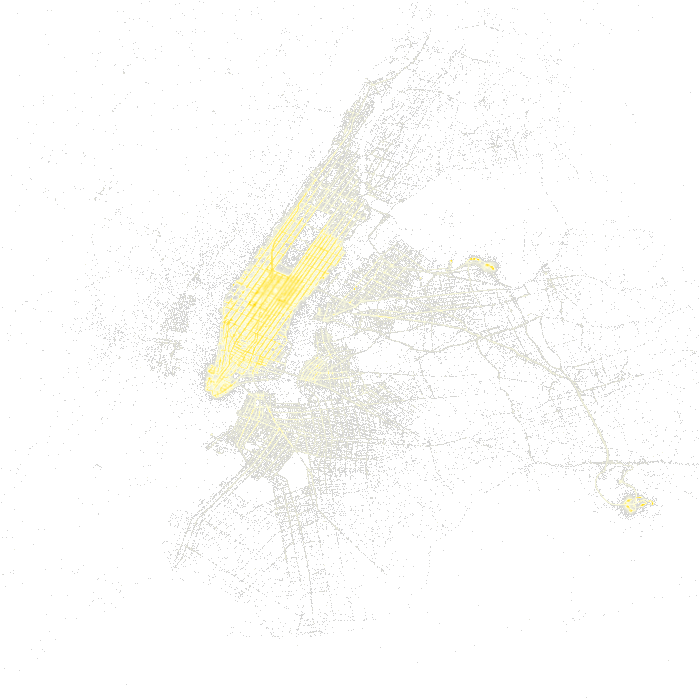

In [16]:
yellow_img

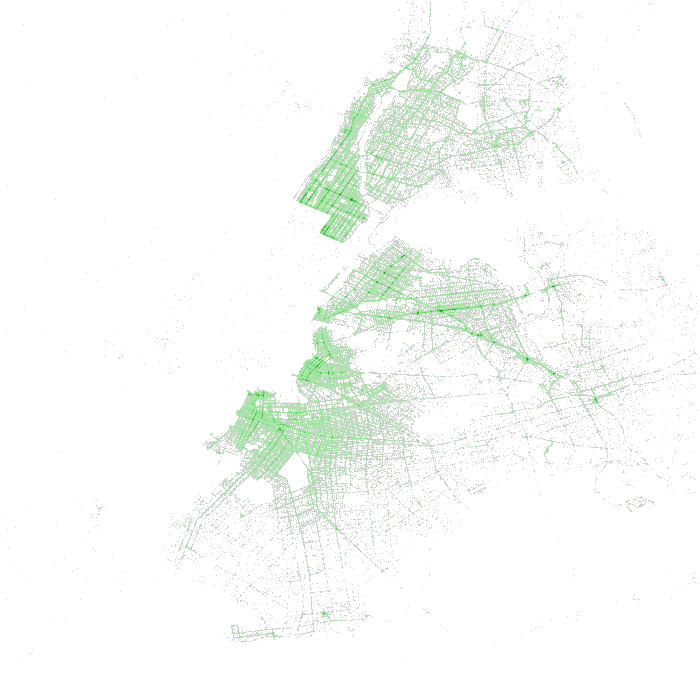

In [17]:
green_img

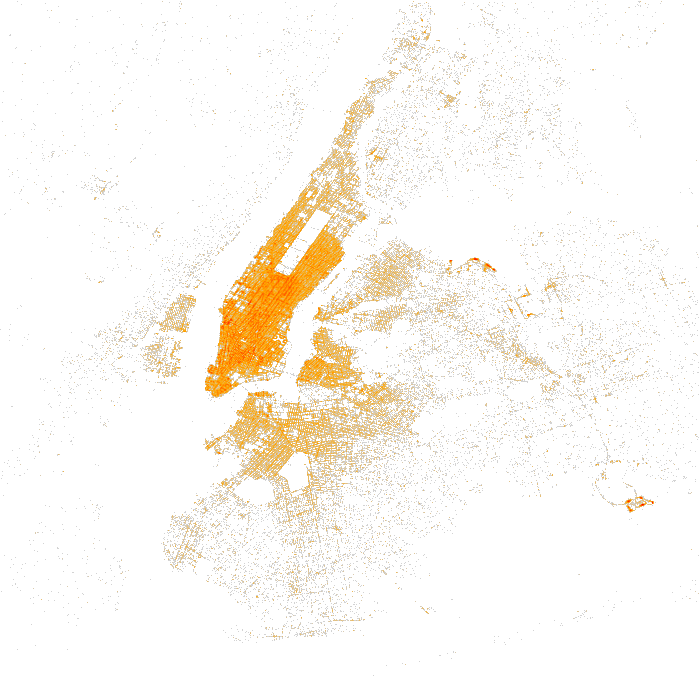

In [18]:
uber_img

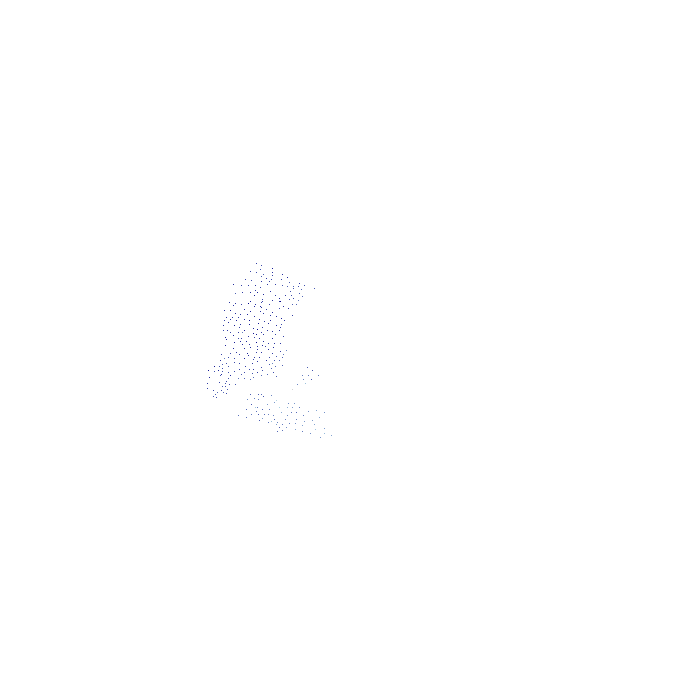

In [19]:
citi_img

In [16]:
def static_to_bokeh(x_range, y_range, pw=plot_width, ph=plot_height):
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
    yellow_agg = cvs.points(yellow_df, 'pickup_longitude', 'pickup_latitude')
    yellow_img = tf.shade(yellow_agg, cmap=["lightgrey",'tan', 'gold'], how='log')
    return tf.dynspread(yellow_img, threshold=0.5, max_px=1)

#base = base_plot()
#base.title.text = 'Yellow Taxi Pick-up Trip Distribution'
#InteractiveImage(base, static_to_bokeh)

<img src="Yellow_geo.PNG">

Looking at the spatial trends, we can get a good feel for where users are picking up each of the investigation modes. To start, we can see that yellow cab pick-ups are located with the highest density around Midtown Manhattan and along Broadway. These are probably the most high traffic areas in the city with a large proportion of entertainment, shopping, and business options. The next two hot spots we can identify are the airports, JFK and LaGuardia. Yellow cabs are not limited in where they can pick passengers up, so the spatial distribution also highlights the main thoroughfares in the outer boroughs, but we can see the quick drop off in pickups as the distance from the central business district increases.

In [17]:
def static_to_bokeh(x_range, y_range, pw=plot_width, ph=plot_height):
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
    green_agg = cvs.points(green_df, 'pickup_longitude', 'pickup_latitude')
    green_img = tf.shade(green_agg, cmap=["tan",'lightgreen', 'green'], how='log')
    return tf.dynspread(green_img, threshold=0.5, max_px=1)

#base = base_plot()
#base.title.text = 'Green Taxi Pick-up Trip Distribution'
#InteractiveImage(base, static_to_bokeh)

<img src="green_geo.PNG">

The most striking visual from the green cab spatial distribution is the divide along Manhattan. Because green cabs are regulated to only pick passengers on Manhattan up above West 110th street and East 96th street, there is an entire piece of the city missing from the spatial depiction. With this limitation, we can still observe the heightened pickup activity along the border with Manhattan. It is not surprising that the majority of green cab pickup hot spots fall in the Northern Manhattan area and along the neighborhoods in Brooklyn, Queens, and the Bronx that border the island. An interesting point concerning the green cab distribution are the hotspots further out in Queens that correspond to transit hubs along the LIR and subway.

In [18]:
def static_to_bokeh(x_range, y_range, pw=plot_width, ph=plot_height):
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
    uber_agg = cvs.points(uber_df, 'pickup_longitude', 'pickup_latitude')
    uber_img = tf.shade(uber_agg, cmap=["lightgrey",'orange', 'red'], how='log')
    return tf.dynspread(uber_img, threshold=0.5, max_px=1)

#base = base_plot()
#base.title.text = 'Uber Pick-up Trip Distribution'
#InteractiveImage(base, static_to_bokeh)

<img src="uber_geo.PNG">

When looking at the spatial distribution of Uber trips, a lot of the features from the yellow cab distribution are also present. There are still dense pick-ups around Midtown Manhattan and high pick-ups at the airports. Something that I found interesting is that the most dense pick-up area (darkest red) is not in the conventional Midtown area, but along the Hudson near the more 'hip' neighborhoods of Chelsea and the Meatpacking District. Upon first inspection I thought the hotspot fell on Madison Square Garden and Penn Station, but through the use of Datashader, I was able to interactively zoom and see that it was in fact not so. This could possibly be explained by the demographics of Uber users and the propensity of younger more tech savvy users to visit trendy neighborhoods or areas. It is worth it to note that this is simply a trend seen during September 2014 and that other months would need to be investigated. 

In [19]:
def static_to_bokeh(x_range, y_range, pw=plot_width, ph=plot_height):
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
    citi_agg = cvs.points(citi_df, 'start_station_longitude', 'start_station_latitude')
    citi_img = tf.shade(citi_agg, cmap=["lightgrey",'lightblue', 'blue', 'purple'], how='log')
    return tf.dynspread(citi_img, threshold=.7, max_px=10)

#base = base_plot()
#base.title.text = 'Citi Bike Pick-up Trip Distribution'
#InteractiveImage(base, static_to_bokeh)

<img src="citi_geo.PNG">

Finally, looking at the distribution of Citi Bike pick-ups, we can see that the stations on Manhattan are busier the closer you get to the middle of the island, and that usage seems to decline as the stations get further out and further from major thoroughfares. However, usage across all stations remains relatively even when compared to the distibutions of the other three modes. 

# Summary

The conclusions drawn from these graphs and spatial depictions are based on qualitative interpretations of the visual data. Statistical analysis should be done to further validate the trends seen through data visualization. The conclusions here are also only indicative of September 2014 as that is when the data is from. Although this is only preliminary analysis focusing on a subset of a wider data pool, it does provide insight not found in the other analyses previously mentioned. Further analysis should be done in order to better understand the trends observed here.

# Moving Forward

Due to resource and time constraints, only one month of data was investigated in this analysis. In the future, further analysis and comparisons across the rest of 2014 and into 2015 will paint a more complete picture of yearly trends. It will also be able to highlight major yearly changes, especially with Citi Bike and Uber, as smart phone technology imporves available imformation for these modes. Another interesting path for investigation is the inclusion of transit data. Subway and bus ridership information coupled with this analysis will fully encompass the most readily accessable modes, outside of walking trips, avaliable to the everyday citizen. Along with the inclusion of more modes, a deeper investigation into the spatial distribution of these dataset can provide more information on the travel patterns of residents throughout the city. Comparisons with demograpic and economic data can be used to see how the modes are providing access to various groups. At the currently city wide level, neighborhood trends become more difficult to see. An added layer of trips made by borough could show some interesting trends as well. The plotting of spatial data, refined temporally, with land use data can also be used to get a sense of where people are working as well as where they are going for recreation. 

# References
Data:

Taxi Data - http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml

Uber Data - https://github.com/fivethirtyeight/uber-tlc-foil-response/tree/master/uber-trip-data

Citi Bike - https://www.citibikenyc.com/system-data

Weather - https://www.wunderground.com/history/airport/KJFK/2014/9/1/MonthlyHistory.html?&reqdb.zip=&reqdb.magic=&reqdb.wmo=&format=1

Exisiting Research:

FiverThiryEight - http://fivethirtyeight.com/tag/transportation/

Todd Schneider - http://toddwschneider.com/posts/analyzing-1-1-billion-nyc-taxi-and-uber-trips-with-a-vengeance/

                http://toddwschneider.com/posts/a-tale-of-twenty-two-million-citi-bikes-analyzing-the-nyc-bike-share-system/
